# Part 7 머신러닝 데이터 분석

## 1 머신러닝 개요

### 1-1 머신러닝이란?

### 1-2 지도 학습 vs 비지도 학습

### 1-3 머신러닝 프로세스

## 2 회귀분석

### 2-1 단순회귀분석

#### step 1 - 데이터 준비

In [1]:
%cd /content/drive/MyDrive/AI/Bart/파이썬 머신러닝 판다스 데이터 분석/data

/content/drive/MyDrive/AI/Bart/파이썬 머신러닝 판다스 데이터 분석/data


In [2]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# csv 파일을 데이터프레임으로 변환
df = pd.read_csv('auto-mpg.csv' , header = None)

# 열 이름 지정
df.columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower' , 'weight',
              'acceleration' , 'model year' , 'origin' , 'name']

# 데이터 살펴보기
print(df.head())
print('\n')

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns' , 10)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

#### Step 2 - 데이터 탐색

In [3]:
# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약 정보 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

In [4]:
# horsepower 열의 자료형 변경(문자열 -> 숫자)
print(df['horsepower'].unique())
print('\n')

df['horsepower'].replace('?' , np.nan , inplace = True)
df.dropna(subset = ['horsepower'] , axis = 0 , inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

print(df.describe())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1

룰루~

#### Step 3 - 속성 선택

In [5]:
# 분석에 활용할 열(속성) 선택(연비 , 실린더 , 출력, 중량)
ndf = df[['mpg' , 'cylinders' , 'horsepower' , 'weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


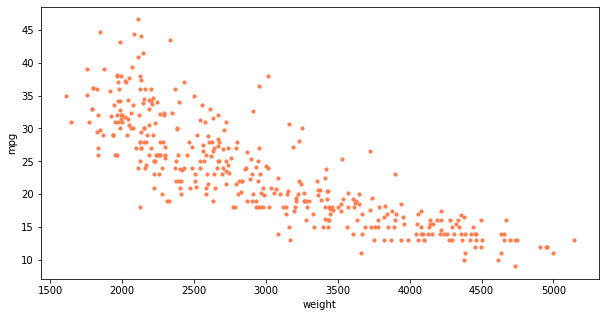

In [6]:
### 종속 변수 Y인 "연비 (mpg) "와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind = 'scatter' , x = 'weight' , y = 'mpg' , c = 'coral' , s =10  , figsize=(10 , 5))
plt.show()
plt.close()

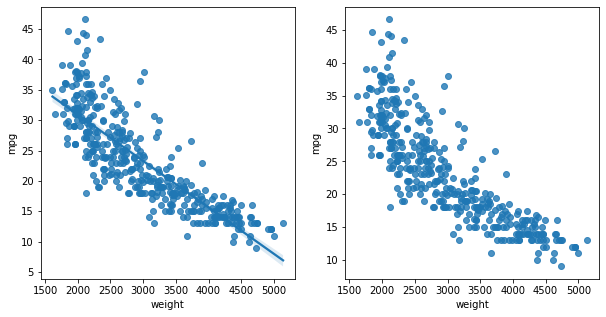

In [7]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize = (10 , 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x = 'weight' , y = 'mpg' , data = ndf , ax = ax1)
sns.regplot(x = 'weight' , y = 'mpg' , data = ndf , ax = ax2 , fit_reg=False)
plt.show()
plt.close()

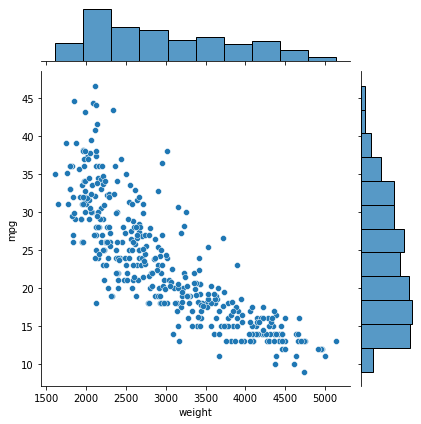

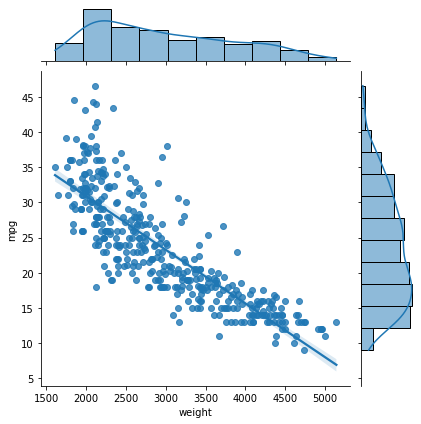

In [8]:
# seaborn 조인트 그래프 = 산점도, 히스토그램
sns.jointplot(x = 'weight' , y = 'mpg' , data = ndf)
sns.jointplot(x = 'weight' , y = 'mpg' , kind='reg' , data = ndf)
plt.show()
plt.close()

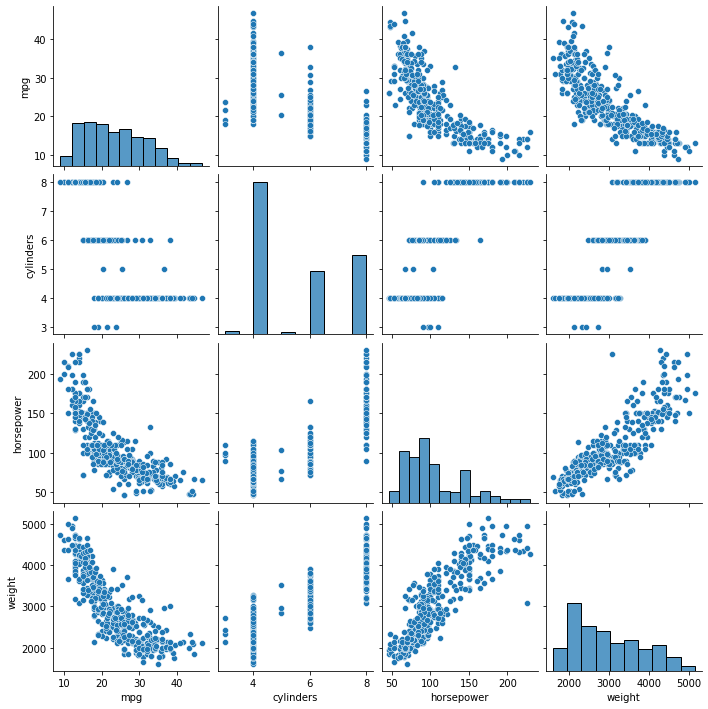

In [9]:
# seaborn pariplot으로 변수 간의 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

#### Step 4 - 훈련/검증 데이터 분할

In [10]:
# 속성(변수) 선택
X = ndf[['weight']]
y = ndf['mpg']

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size = 0.3,
                                                       random_state = 10)
print('train data 개수: ' , len(X_train))
print('test data 개수: ' , len(X_test))

train data 개수:  274
test data 개수:  118


#### Step 5 - 모형 학습 및 검증

In [11]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train , y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 (R-제곱) 계산
r_square = lr.score(X_test , y_test)
print(r_square)

0.6822458558299322


In [12]:
#회귀식의 기울기 
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b' , lr.intercept_)

기울기 a:  [-0.00775343]


y절편 b 46.7103662572801


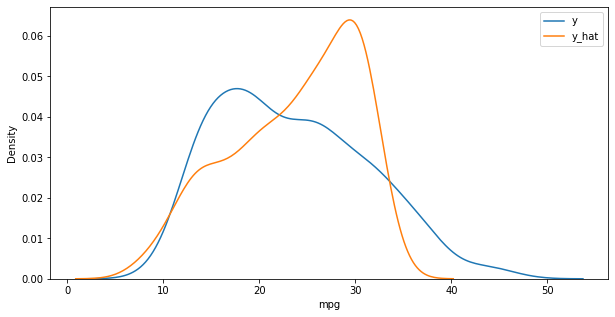

In [13]:
# 모형에 존체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize=(10 , 5))
ax1 = sns.kdeplot(y , label = "y")
ax2 = sns.kdeplot(y_hat , label = "y_hat" , ax=  ax1)
plt.legend()
plt.show()

### 2-2 다항회귀분석

#### 데이터 준비

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv' , header = None)
# 열 이름 지정
df.columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower' , 'weight',
              'acceleration' , 'model year' , 'origin' , 'name']

# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?' , np.nan , inplace = True)
df.dropna(subset = ['horsepower'] , axis = 0 , inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

# 분석에 활용할 열(속성) 선택(연비 , 실린더 , 출력, 중량)
ndf = df[['mpg' , 'cylinders' , 'horsepower' , 'weight']]

# ndf 데이터를 train data와 test data로 구분 (7:3 비율)
X = ndf[['weight']]
y = ndf['mpg']

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


#### 모형 학습 및 검증

In [15]:
# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 다항식 변환
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)

print('원 데이터: ' , X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [16]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly , y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7087009262975481


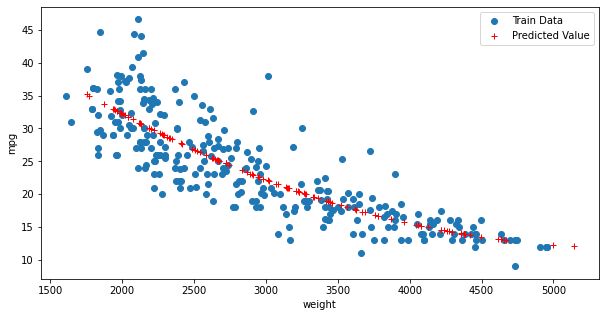

In [17]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train , y_train , 'o'  ,label = 'Train Data')
ax.plot(X_test , y_hat_test , 'r+' , label = 'Predicted Value')
ax.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

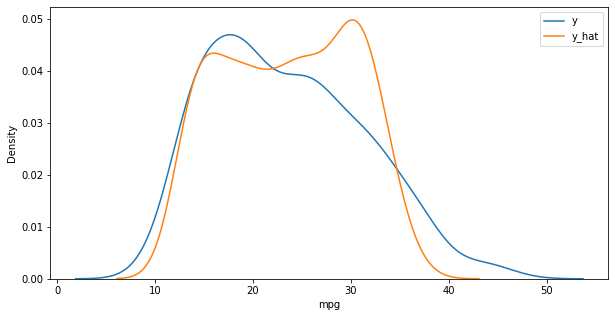

In [18]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10 , 5))
ax1 = sns.kdeplot(y , label = "y")
ax2 = sns.kdeplot(y_hat , label = "y_hat"  , ax = ax1)
plt.legend()
plt.show()

### 2-3 다중회귀분석

#### 데이터 준비

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv' , header = None)
# 열 이름 지정
df.columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower' , 'weight',
              'acceleration' , 'model year' , 'origin' , 'name']

# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?' , np.nan , inplace = True)
df.dropna(subset = ['horsepower'] , axis = 0 , inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

# 분석에 활용할 열(속성) 선택(연비 , 실린더 , 출력, 중량)
ndf = df[['mpg' , 'cylinders' , 'horsepower' , 'weight']]

# ndf 데이터를 train data와 test data로 구분 (7:3 비율)
X = ndf[['weight']]
y = ndf['mpg']

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


#### 모형 학습 및 검증

In [20]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순 회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train , y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test , y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('X 변수의 계수 a: ' , lr.coef_)
print('\n')

# 회귀식의 y절편
print('상수항 b', lr.intercept_)

0.6822458558299322


X 변수의 계수 a:  [-0.00775343]


상수항 b 46.7103662572801


## 3 분류

### 3-1 KNN

#### Step 1 - 데이터 준비

In [21]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비 - seaborn에서 제공하는 titanic 데이터셋 가져오기
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

# 데이터 살펴보기
print(df.head())
print('\n')

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns' , 15)
print(df.head())

   survived  pclass     sex   age  sibsp  ...  adult_male  deck  embark_town  \
0         0       3    male  22.0      1  ...        True   NaN  Southampton   
1         1       1  female  38.0      1  ...       False     C    Cherbourg   
2         1       3  female  26.0      0  ...       False   NaN  Southampton   
3         1       1  female  35.0      1  ...       False     C  Southampton   
4         0       3    male  35.0      0  ...        True   NaN  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  

[5 rows x 15 columns]


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0 

#### Step 2 - 데이터 탐색

In [22]:
'''
[Step 2] 데이터 탐색/전처리
'''
# 데이터 자료형 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [23]:
# NaN 값이 많은 deck 열 삭제, embarked와 내용이 겹치는 embark_town 열 삭제
rdf = df.drop(['deck' , 'embark_town'] , axis = 1)
print(rdf.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [24]:
# age 열에 나이 데이터가 없는 모든 행 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'] , how = 'any' , axis = 0)
print(len(rdf))

714


In [26]:
# embarked 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 치환
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
print('\n')

print(rdf.describe(include = 'all'))
print('\n')

rdf['embarked'].fillna(most_freq , inplace=True)

S


          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000

#### Step 3 - 속성 선택

In [27]:
'''
[Step 3] 분석에 사용할 속성 선택
'''

# 분석에 활용할 열(속성) 선택
ndf = rdf[['survived' , 'pclass' , 'sex' , 'age' , 'sibsp' , 'parch' , 'embarked']]
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


In [28]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 반환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf , onehot_sex] , axis = 1)
onehot_embarked = pd.get_dummies(ndf['embarked'] , prefix = 'town')
ndf = pd.concat([ndf , onehot_embarked] , axis = 1)

ndf.drop(['sex' , 'embarked'] , axis = 1 , inplace = True)
print(ndf.head())

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


#### Step 4 - 훈련/검증 데이터 분할

In [30]:
'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['pclass' , 'age' , 'sibsp' , 'parch' , 'female' , 'male' , 'town_C' , 'town_Q' , 'town_S']]    # 설명 변수 X
y = ndf['survived']  # 예측 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분(7:3 qldbf)
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


#### Step 5 - 모형 학습 및 검증

In [31]:
'''
[Step 5] KNN 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5 로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train_data를 가지고 모형 학습
knn.fit(X_train , y_train)

# test data를 가지고 y_hat을 예측(분류)
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [32]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test , y_hat)
print(knn_matrix)

[[111  14]
 [ 24  66]]


In [33]:
# 모형 성능 평가 - 평가 지표 계산
knn_report = metrics.classification_report(y_test , y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       125
           1       0.82      0.73      0.78        90

    accuracy                           0.82       215
   macro avg       0.82      0.81      0.82       215
weighted avg       0.82      0.82      0.82       215



### 3-2 SVM

In [35]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비 - seaborn에서 제공하는 titanic 데이터셋 가져오기
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns' , 15)

'''
[Step 2] 데이터 탐색/전처리
'''


# NaN 값이 많은 deck 열 삭제, embarked와 내용이 겹치는 embark_town 열 삭제
rdf = df.drop(['deck' , 'embark_town'] , axis = 1)

# age 열에 나이 데이터가 없는 모든 행 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'] , how = 'any' , axis = 0)

# embarked 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 치환
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()

rdf['embarked'].fillna(most_freq , inplace=True)

'''
[Step 3] 분석에 사용할 속성 선택
'''

# 분석에 활용할 열(속성) 선택
ndf = rdf[['survived' , 'pclass' , 'sex' , 'age' , 'sibsp' , 'parch' , 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 반환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf , onehot_sex] , axis = 1)
onehot_embarked = pd.get_dummies(ndf['embarked'] , prefix = 'town')
ndf = pd.concat([ndf , onehot_embarked] , axis = 1)

ndf.drop(['sex' , 'embarked'] , axis = 1 , inplace = True)

'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['pclass' , 'age' , 'sibsp' , 'parch' , 'female' , 'male' , 'town_C' , 'town_Q' , 'town_S']]    # 설명 변수 X
y = ndf['survived']  # 예측 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분(7:3 qldbf)
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


#### 모형 학습 및 검증

In [38]:
'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성(kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf')

# train_data를 가지고 모형 학습
svm_model.fit(X_train , y_train)

# test data를 가지고 y_hat 예측(분류)
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [39]:
# 모형 성능  평가 - Confusion Matrix 계산
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test , y_hat)
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가 지표 계산
svm_report = metrics.classification_report(y_test , y_hat)
print(svm_report)

[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



### 3-3 Decision Tree

#### 데이터 준비

In [42]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np

'''
[Step 1] 데이터 준비/기본 설정
'''

# Breast Cancer 데이터셋 가져오기 (출처: UCL ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path , header = None)

# 열 이름 지정
df.columns = ['id' , 'clump' , 'cell_size' , 'cell_shape' , 'adhesion' , 'epihlial' , 'bare_nuclei' , 'chromatin' , 'normal_nucleoli' , 'mitoses' , 'class' ]

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns' , 15)

'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())
print('\n')

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약 정보 확인
print(df.describe())

        id  clump  cell_size  cell_shape  adhesion  epihlial bare_nuclei  \
0  1000025      5          1           1         1         2           1   
1  1002945      5          4           4         5         7          10   
2  1015425      3          1           1         1         2           2   
3  1016277      6          8           8         1         3           4   
4  1017023      4          1           1         3         2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump   

In [44]:
# bare_nuclei 열의 자료형 변경(문자열 -> 숫자)
print(df['bare_nuclei'].unique() )
print('\n')

df['bare_nuclei'].replace('?' , np.nan , inplace = True)
df.dropna(subset=['bare_nuclei'] , axis = 0 , inplace = True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

print(df.describe())

['1' '10' '2' '4' '3' '9' '7' nan '5' '8' '6']


                 id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

         epihlial  bare_nuclei   chromatin  normal_nucleoli     mitoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.

In [45]:
'''
[Step 3] 데이터 구분 - 훈련용(train data) / 검증용(test data)
'''

X = df[[ 'clump' , 'cell_size' , 'cell_shape' , 'adhesion' , 'epihlial' , 'bare_nuclei' , 'chromatin' , 'normal_nucleoli' , 'mitoses']]
y = df['class']

# 설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ' , X_test.shape)

train data 개수:  (478, 9)
test data 개수:  (205, 9)


#### 모형 학습 및 검증

In [46]:
'''
[Step 4] Decision Tree 분류 모형 -sklearn 사용
'''

# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

# 모형 객체 생성(criterion='entropy' 적용)
tree_model = tree.DecisionTreeClassifier(criterion='entropy' , max_depth = 5)

# train data를 가지고 모형 학습
tree_model.fit(X_train , y_train)
# test_data를 가지고 y_hat 예측(분류)
y_hat = tree_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [47]:
# 모형 성능 평가 - COnfusion Matrix 계산
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test , y_hat)
print(tree_matrix)
print('\n')

# 모형 성능 평가 - 평가 지표 계산
tree_report = metrics.classification_report(y_test , y_hat)
print(tree_report)

[[127   4]
 [  2  72]]


              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



## 4 군집

### 4-1 K-Means

In [51]:
### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

'''
[Step 1] 데이터 준비
'''

# Wholesale customers 데이터셋 가져오기(출처: UCL ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path , header = 0)

'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴 보기
print(df.head())
print('\n')

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약 정보 확인
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

룰루~~

In [52]:
'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성 선택
X = df.iloc[:,:]
print(X[:5])
print('\n')

# 설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


#### 모형 학습 및 검증

In [53]:
'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''
# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++' , n_clusters = 5 , n_init=10)

# 모형 학습 
kmeans.fit(X)

# 예측 (군집)
cluster_label = kmeans.labels_
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

[3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 0 3 0 3 0 3 0 0 4 3 3 0 0 3 0 0 0 0 0 0 3 0
 3 3 0 0 0 3 3 3 3 3 2 3 3 0 0 3 3 0 0 2 3 0 0 3 2 3 3 0 2 0 3 0 0 0 0 0 3
 3 0 0 3 0 0 0 3 3 0 3 2 2 0 0 0 0 0 2 0 3 0 3 0 0 0 3 3 3 0 0 0 3 3 3 3 0
 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 3 3 0 3 3 3 0 0 3 3 3 3 0 0 0 3 3 0 3 0 3 0 0 0 0 0 4 0 4 0
 0 0 0 3 3 0 0 0 3 0 0 1 3 1 1 3 3 1 1 1 3 1 1 1 3 1 2 1 1 3 1 3 1 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 3 1 3 1 3 1 1 1 1 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 3 1 3
 1 3 3 1 3 3 3 3 3 3 3 1 1 3 1 1 3 1 1 3 1 1 1 3 1 1 1 1 1 4 1 1 1 1 1 3 1
 2 1 3 1 1 1 1 3 3 0 3 0 0 3 3 0 3 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0
 3 0 0 3 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 3 3 0 0 0 0 0 0 3 3 0 3 0 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

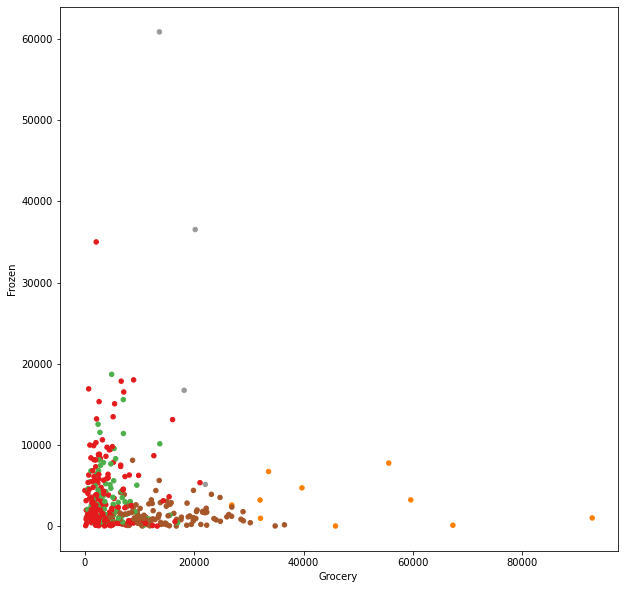

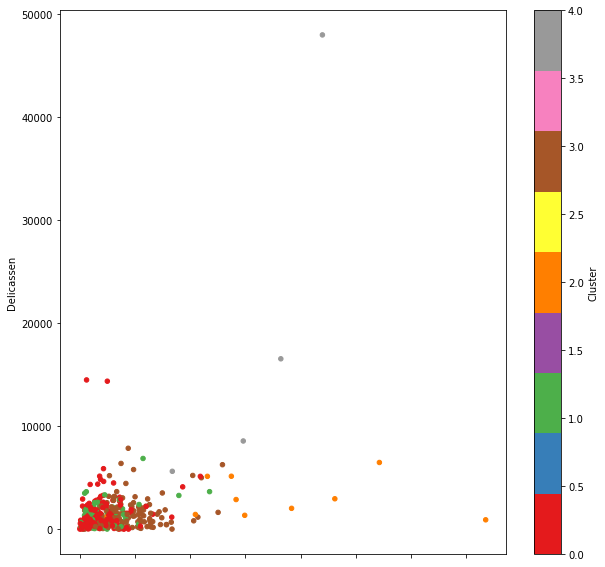

In [54]:
# 그래프로 표현 - 시각화
df.plot(kind = 'scatter' , x = 'Grocery' , y = 'Frozen' , c='Cluster' , cmap='Set1' , colorbar=False , figsize = (10, 10) )
df.plot(kind = 'scatter' , x = 'Milk' , y = 'Delicassen' , c='Cluster' , cmap='Set1' , colorbar=True , figsize = (10, 10) )
plt.show()
plt.close()

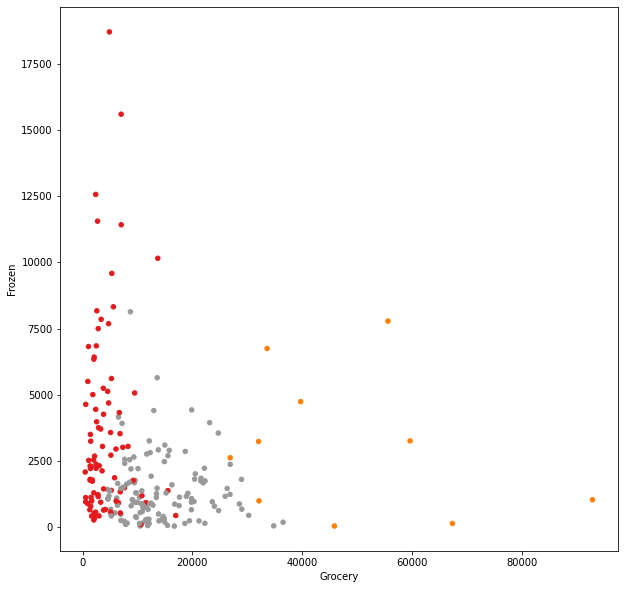

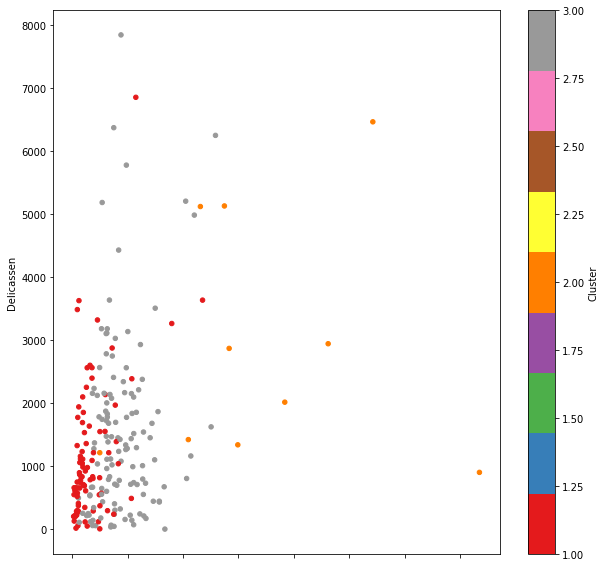

In [56]:
# 큰 값으로 구성된 클러스터(0,4) 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind = 'scatter' , x = 'Grocery' , y = 'Frozen' , c='Cluster' , cmap='Set1' , colorbar=False , figsize = (10, 10) )
ndf.plot(kind = 'scatter' , x = 'Milk' , y = 'Delicassen' , c='Cluster' , cmap='Set1' , colorbar=True , figsize = (10, 10) )
plt.show()
plt.close()

### 4-2 DBSCAN

#### 데이터 준비

In [65]:
%cd /content/drive/MyDrive/AI/Bart/파이썬 머신러닝 판다스 데이터 분석/data

/content/drive/MyDrive/AI/Bart/파이썬 머신러닝 판다스 데이터 분석/data


In [72]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
### 기본 라이브러리 불러오기
import pandas as pd
import folium

'''
[Step 1] 데이터 준비/기본 설정
'''

# 서울시내 중학교 진학융 데이터셋
file_path = './2016_middle_shcool_graduates_report.xlsx'
df = pd.read_excel(file_path , header = 0 , engine = 'openpyxl')

BadZipFile: ignored

In [ ]:
df